### Introduction to Python and MD

Molecular simulations will be an important component of this course. The twin goals of these projects are:
1. To help you visualize and understand the physics of light-matter interactions, and 
2. To give you a basic understanding of scientific programming and data analysis. 

For computational work, we'll _mostly_ use the Python programming language, compiled and run interactively using Jupyter Notebooks. The Jupyter Notebook is a web application that allows you to run python scripts in your web browser, complete with nicely-formatted text and graphical output. The purpose of this first exercise is to give you some familiarity with Python and the Jupyter Notebook environment, as well as to give you a first taste of molecular dynamics (MD) simulations. 

### Jupyter Notebooks and Python Programming

First let's talk about Jupyter and Python. ***Python*** is a programming language -- a set of commands that can be translated (i.e. compiled) into the 1s and 0s that your computer can understand and run. Python is a relatively *high level* language, meaning that the compiler hides most of the details of how your program is actually executed by the computer. For example, in Python you can create a variable called "x" by just typing the command "x = 3". In a low-level programming language (e.g., Fortran or C), this would cause an error unless you had already warned the computer ("declared") that you were going to use a variable named "x". High-level programming languages like Python are usually easier to learn and faster to code in since the compiler handles many steps automatically. On the other hand, low-level languages tend to be more difficult to learn and use, but they offer greater control and -- when used properly -- can make for faster execution. 

The Jupyter Notebook is a web application that allows you to write and execute python programs (among other things) in your web browser. I recommend installing the Jupyter Notebook application as part of the Anaconda Distribution (https://www.anaconda.com/distribution/). Once the app is installed you can edit and run Jupyter Notebooks directly in your web browser. 

Code is written and executed in a Jupyter Notebook in individual snippets called "cells". The text that you're reading right now is written in a "Markdown" cell for formatted text, while the cell below is a Python cell that contains code to print the phrase "Hellow world!" to the screen. To execute the cell, click on it and type <Shift+Enter>. 

In [84]:
print("Hello World!")

Hello World!


Once you execute the cell, you should see the text "Hello World!" appear just below it. To see some more interesting programming, I'm next going to walk you through a simple simulation. As you work through the simulation, each time you see a grey Python cell, click on the text and type <Shift+Enter> to execute the code. 

### A Simple MD Simulation
One of the primary computational methods we'll use in this course is *molecular dynamics* -- an iterative procedure in which classical systems are propagated through time according to Newton's equations. We'll discuss these methods in more detail shortly, but for now we'll adopt a _really_ simple version just to show you what Python code looks like. Specifically, we'll look at a single, hard-sphere particle moving in a squre (two-dimensional) box with hard walls. Each time the ball hits the wall, it simply bounces off, changing the direction of either its $x$ or $y$ velocity. 

First, we'll define some basic parameters for our simulation. To do this, click on the grey box below and press <Ctrl+Enter> on your keyboard or click the "play" icon above. 

In [85]:
import math
tmax=0.01        # Total simulation time in seconds
dt=0.0001     # Time-step in seconds
M=4            # Mass in AMU (1 AMU = 1.66054e-27 kg)
L=1            # Box length in meters
V=790          # Velocity (magnitude) in m/s

print("\n\nSuccessfully defined simulation parameters.")



Successfully defined simulation parameters.


This particular cell defines five parameters: tmax, dt, M, V, and L. The text separated to the right by hash signs is commentary, explaining what each parameter represents physically. Our parameters are chosen to be typical for a single He atom at room temperature. The "import" command in the first line tells Python that we'll want access to certain mathematic functions that aren't defined by default. I'll say a bit more about "import" commands later.

Next, we'll need to initialize our system -- specify the particular values of position and momentum we want the particle to start with. 

In [86]:
x=0                                   # initial x-coordinate (meters)
y=0                                   # initial y-coordinate (meters)
vx = 1                                # initial x-component of velocity (arbitrary units)
vy = 2                                # initial y-component of velocity (arbitrary units)
NormFac = math.sqrt(vx*vx + vy*vy)    # This square-root command is why we needed to import the math module
vx = V*vx/NormFac                     # Normalize so that total velocity is V
vy = V*vy/NormFac    

print("Successfully initialized particle velocity and position")

Successfully initialized particle velocity and position


And, finally, we're ready to run the simulation. We calculate the number of steps (Nsteps) of stepsize dt needed to reach tmax. We then step through each time-value iteratively, updating the position of the particle each time. 

In [87]:
Nsteps=int(round(tmax/dt))          # Total number of simulation time steps
for n in range(0,Nsteps):      # Iterate n=1,2,3,....
    x = x + dt*vx              # x-coordinate increases by dt*vx
    y = y + dt*vy              # y-coordinate increases by dt*vy
    if(x>1 or x<0):            # If the particle hits a wall, switch the velocity!
        vx=-vx
    if(y>1 or y<0):            # If the particle hits a wall, switch the velocity!
        vy=-vy
        
print("Final coordinates: (", x, ",", y, ")")    # Print (x,y) coordinates for final step

Final coordinates: ( 0.5652779847119467 , 0.28263899235597345 )


That's it! We've run our first MD simulation! The pair of numbers on the line just above indicates the (x,y) coordinates of the particle after the final step. 

Not very exciting, was it? Let's make things more interesting by learning how to display the simulation in real-time as it progresses -- a "molecular movie". 


### Plotting Data Using Matplotlib

Plotting in Jupyter Notebooks is accomplished using the Matplotlib library, a set of python commands that mimics (for the most part) the Matlab plotting style. Since Matplotlib isn't available by default, we have to import it. 

The syntax for importing a module in Python is "import &lt;full module name&gt; as &lt;nickname&gt;". The full module name here is the official name of the library you want to use, e.g., matplotlib, numpy, or math. The nickname is a name *you* come up with that you'll prepend to all commands you use from that library; preferably this should be short and memorable since you'll type it every time you wanto to reference the module. In the code snippet below, for example, we import matplotlib.pyplot as "plt". When we want to use the matplotlib `plot()` command, we'll actually type `plt.plot()` to indicate that the function `plot()` we want to use is part of the matplotlib.pyplot library.

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display
import time

With these tools, plotting our MD simulation on the fly is easy

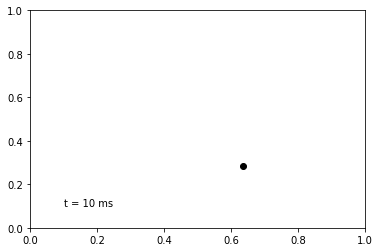

In [114]:
Nsteps=int(round(tmax/dt))     
for n in range(0,Nsteps):      
    x = x + dt*vx              
    y = y + dt*vy              
    if(x>1 or x<0):            
        vx=-vx
    if(y>1 or y<0):            
        vy=-vy
    plt.clf()
    plt.text(0.1,0.1,'t = '+str(round(n*dt*1000))+' ms')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.plot(x,y,'ko')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    #time.sleep(0.001)


### Homework

Now that you've seen some basics, your assignment for this week is to write a new Jupyter Notebook file that repeats this MD simulation but with *two* particles in the box. For simplicity, we'll ignore interactions between the particles, i.e., the particles are elements of an ideal gas. For your assignment:
* Make a ***new*** Jupyter notebook file
* Copy and paste code cell blocks from above into a *single* cell block in your new notebook to make a complete single-particle simulation. Make sure that your simulation runs!
* Now add the second particle by duplicating the relevant parts of the code, renaming variables as needed (e.g., instead of just "x" for a single particle, you may want to use "x1" for the first particle and "x2" for the second). 

### For EXTRA CREDIT
Write a program that simulates *N* particles, where *N* is a positive integer. Instead of defining individual variables (x1, x2, x3,...) for each particle, you'll want to make a *list* or *vector* of variables (x = (x1,x2,x3,...) that you can access iteratively. For that, I strongly recommend the NumPy package, which we'll see more of in future weeks. 